In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.show()

#Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.


In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')


In [4]:
#4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.
#5. How many rows and columns are in `gdp_df`? What are the data types of each column?
gdp_df
#type(gdp_df)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [5]:
type(gdp_df)

pandas.core.frame.DataFrame

In [6]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


In [7]:
gdp_df.head()


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [8]:
gdp_df.tail()


,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


In [9]:
type(gdp_df)


pandas.core.frame.DataFrame

In [10]:
#number of rows and columns 
gdp_df.shape


(7662, 4)

In [11]:
#pd.set_option('display.max_rows', None)

6.Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [12]:
#gdp_df.columns = ['Country','Year','GDP_Per_Capita']

In [13]:
#gdp_df

In [14]:
gdp_df = gdp_df.drop(columns=['Value Footnotes']).rename(columns={
    'Country or Area': 'Country',
    'Value': 'GDP_Per_Capita'
})

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [15]:
# Count per country and year!
country_year_counts = gdp_df.groupby('Country').Year.nunique()


In [16]:
print(country_year_counts)

Country
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
                               ..
Viet Nam                       33
West Bank and Gaza             29
World                          33
Zambia                         33
Zimbabwe                       33
Name: Year, Length: 242, dtype: int64


In [17]:
all_years = gdp_df['Year'].nunique() 

In [18]:
countries_with_all_years = country_year_counts[country_year_counts == all_years].index.tolist()

In [19]:
len(countries_with_all_years)

202

In [20]:
#countries missing year of data 
countries_missing_years = country_year_counts[country_year_counts < all_years]

In [21]:
countries_missing_years.count()

40

In [22]:
# number of observations per year with count 
observations_per_year = gdp_df['Year'].value_counts().sort_index()

In [23]:
observations_per_year


Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
Name: count, dtype: int64

#8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [24]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
#data_2020 = gdp_df[gdp_df['Year'] == 2020]['GDP_Per_Capita']

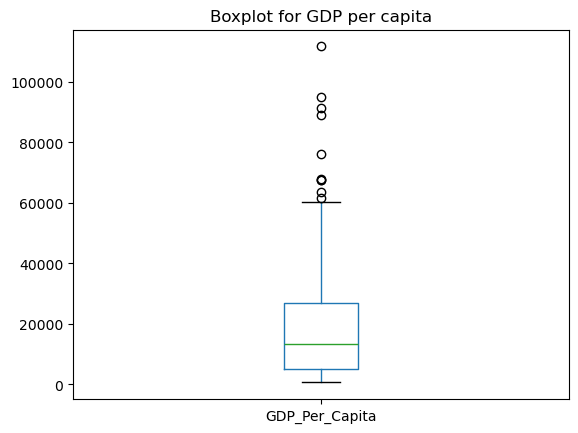

In [25]:
# Boxplot using Pandas
gdp_2020.boxplot(column =['GDP_Per_Capita'], grid = False)
#plt.xlabel('GDP Per Capita')
plt.title('Boxplot for GDP per capita')
plt.show()

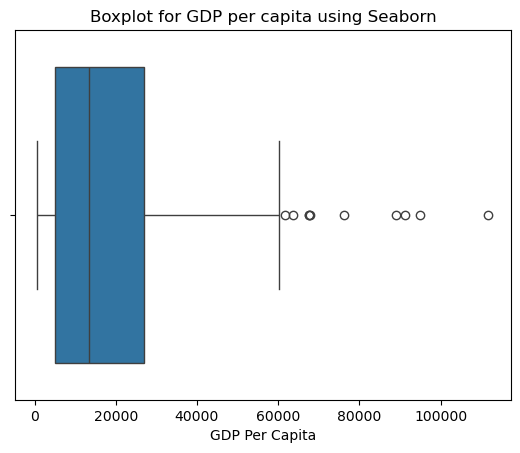

In [26]:
# Boxplot using Seaborn
sns.boxplot(data =gdp_2020, x='GDP_Per_Capita')
plt.xlabel('GDP Per Capita')
plt.title('Boxplot for GDP per capita using Seaborn')
plt.show()

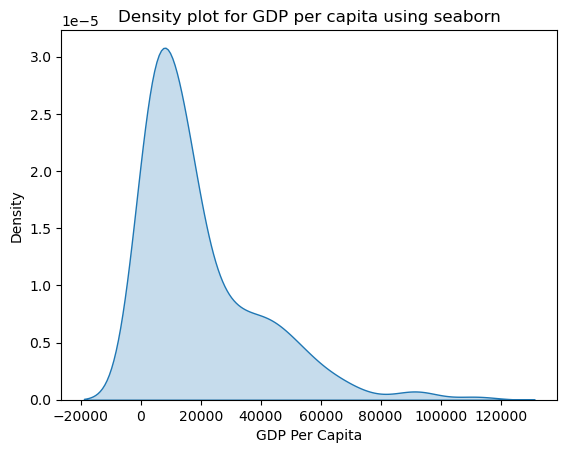

In [27]:
#Create a density plot using seaborn
sns.kdeplot(data = gdp_2020, x= 'GDP_Per_Capita', fill = 'skyblue')
plt.xlabel('GDP Per Capita')
plt.title('Density plot for GDP per capita using seaborn')
plt.show()

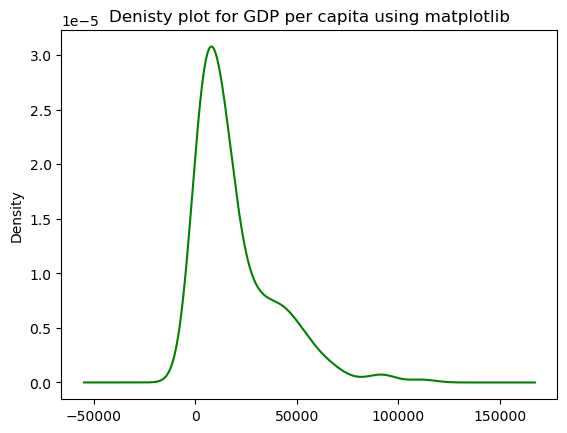

In [28]:
#Create a density plot using matplotlib
gdp_2020.GDP_Per_Capita.plot.density(color='green')
plt.title('Denisty plot for GDP per capita using matplotlib')
plt.show()

9. What was the median GDP per capita value in 2020?

In [29]:
gdp_2020 ['GDP_Per_Capita'].median()

13357.997573370474

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [30]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

In [31]:
gdp_decades.head(10)

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
52,Africa Eastern and Southern,1990,3037.297466
55,Africa Western and Central,2020,3957.933804
65,Africa Western and Central,2010,3737.506710
75,Africa Western and Central,2000,2671.599188
85,Africa Western and Central,1990,2788.301039


Text(0, 0.5, 'GDP per Capita')

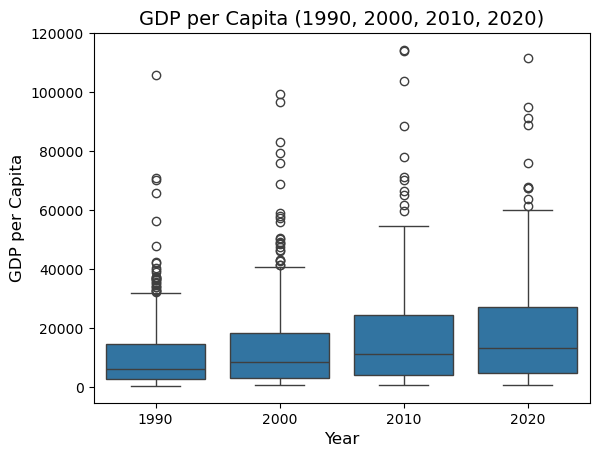

In [32]:
#plt.subplot(2, 2, 1)
sns.boxplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)
plt.title('GDP per Capita (1990, 2000, 2010, 2020)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP per Capita', fontsize=12)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

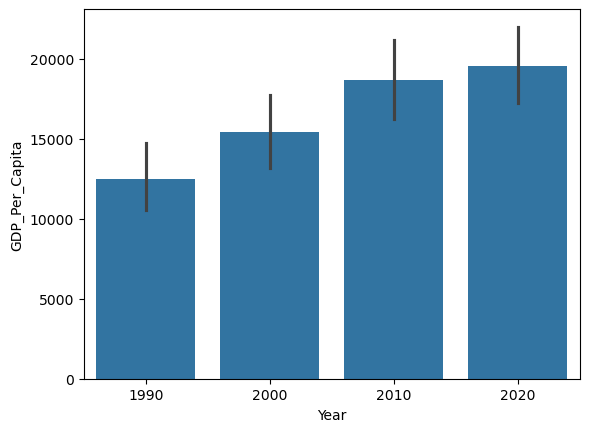

In [33]:
sns.barplot(data= gdp_decades,
            x= 'Year',
            y='GDP_Per_Capita')

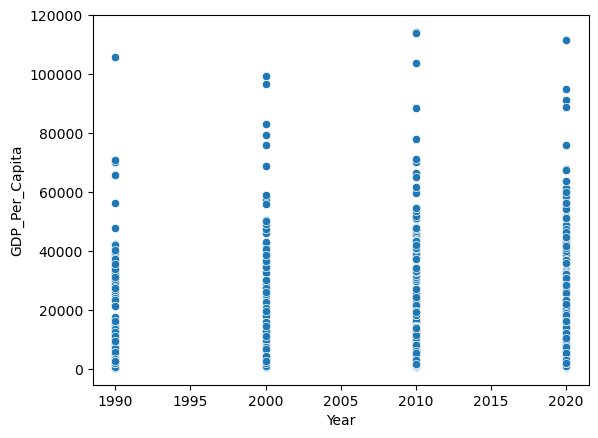

In [34]:
sns.scatterplot(data=gdp_decades,
               x='Year',
               y='GDP_Per_Capita');

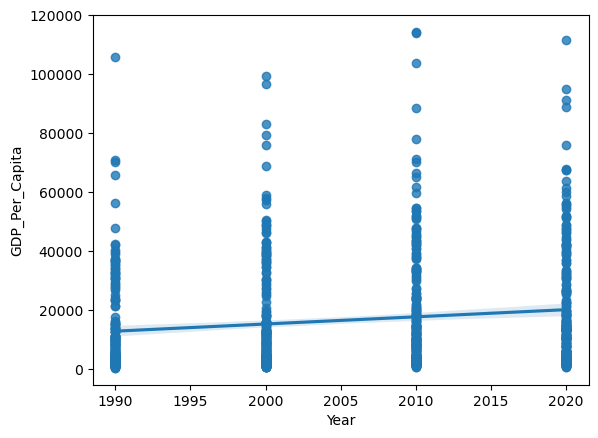

In [35]:
sns.regplot(data = gdp_decades, 
            x = 'Year', 
            y = 'GDP_Per_Capita');

11. Which country was the first to have a GDP per capita greater than $100,000?

In [36]:
gdp_above_100k = gdp_df[gdp_df['GDP_Per_Capita'] > 100000].sort_values('Year')

In [37]:
gdp_above_100k

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
4164,Luxembourg,2004,107634.837198
4163,Luxembourg,2005,108632.360016
4162,Luxembourg,2006,113346.035782
4161,Luxembourg,2007,120647.822959


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [38]:
top_country=gdp_df[gdp_df['Year']==2020].nlargest(1,'GDP_Per_Capita')

In [39]:
top_country

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [40]:
country_name=gdp_df[gdp_df['Year']==2020].nlargest(1,'GDP_Per_Capita')['Country'].tolist()[0]

In [41]:
top_country=gdp_df[gdp_df['Country'] == country_name]

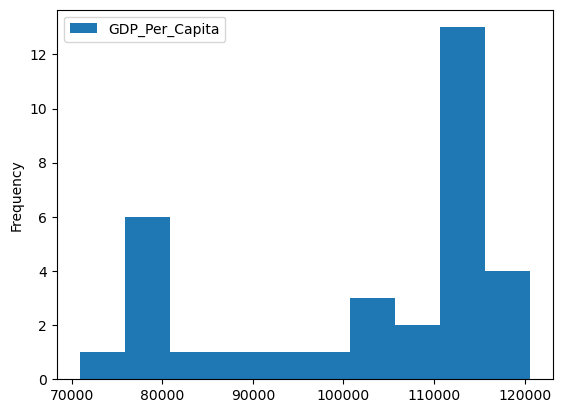

In [42]:
top_country.plot(x='Year',y='GDP_Per_Capita',kind='hist');

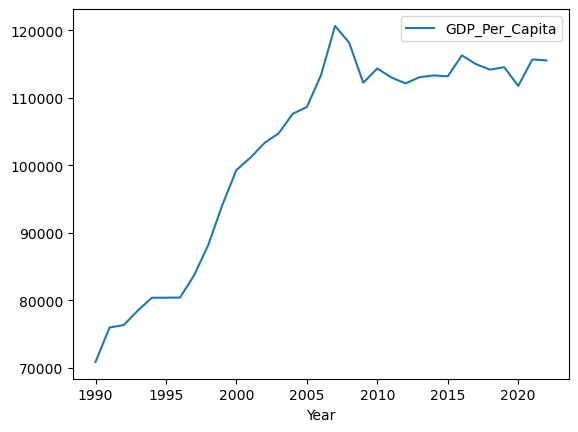

In [43]:
top_country.plot(x='Year',y='GDP_Per_Capita',kind='line');

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [44]:
# Identify the country with the lowest GDP per capita in 2020
lowest_gdp_2020 = gdp_df[gdp_df['Year'] == 2020].nsmallest(1, 'GDP_Per_Capita')

In [45]:

lowest_gdp_2020

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [46]:
lowest_gdp = gdp_df[gdp_df['Year']==2020].nsmallest(1,'GDP_Per_Capita')['Country'].tolist()[0]

In [47]:
lowest_gdp

'Burundi'

In [48]:
lowest_country= gdp_df[gdp_df['Country'] == lowest_gdp]

In [49]:
lowest_country

,Country,Year,GDP_Per_Capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712
973,Burundi,2020,711.355263
974,Burundi,2019,729.658463
975,Burundi,2018,740.448223
976,Burundi,2017,750.787616
977,Burundi,2016,764.336602
978,Burundi,2015,781.579287
979,Burundi,2014,831.294839
980,Burundi,2013,824.610523


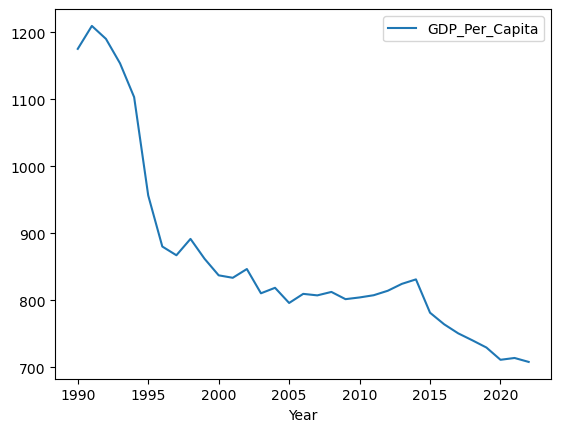

In [50]:
lowest_country.plot(x='Year',y='GDP_Per_Capita',kind='line');

In [51]:
gdp_1990 = gdp_df[gdp_df['Year'] == 1990][['Country', 'GDP_Per_Capita']].rename(columns={'GDP_Per_Capita': 'GDP_1990'})
gdp_2020 = gdp_df[gdp_df['Year'] == 2020][['Country', 'GDP_Per_Capita']].rename(columns={'GDP_Per_Capita': 'GDP_2020'})

In [52]:
# Merge the data for comparison
gdp_comparison = pd.merge(gdp_1990, gdp_2020, on='Country', how='inner')

In [100]:
gdp_1990

,Country,GDP_1990
52,Africa Eastern and Southern,3037.297466
85,Africa Western and Central,2788.301039
118,Albania,4827.027705
151,Algeria,8828.874473
184,Angola,5793.084512
...,...,...
7500,Vanuatu,2774.138350
7533,Viet Nam,2099.394649
7595,World,9705.981267
7628,Zambia,2290.039226


In [101]:
gdp_2020

,Country,GDP_2020
1,Afghanistan,1968.341002
22,Africa Eastern and Southern,3455.023119
55,Africa Western and Central,3957.933804
88,Albania,13278.369769
121,Algeria,10844.770764
...,...,...
7503,Viet Nam,10450.622382
7536,West Bank and Gaza,5402.538773
7565,World,16204.169107
7598,Zambia,3183.650773


In [102]:
# Find countries with lower GDP in 2020 than 1990
lower_gdp_2020 = gdp_comparison[gdp_comparison['GDP_2020'] < gdp_comparison['GDP_1990']]

In [54]:
# Results with lowest and 2020 and 1990
f"The country with the lowest GDP per capita in 2020 is: {lowest_country}"
"\nCountries with lower GDP per capita in 2020 than in 1990:"
lower_gdp_2020[['Country', 'GDP_1990', 'GDP_2020']]

,Country,GDP_1990,GDP_2020
15,Barbados,14097.395550,13805.777541
25,Brunei,70358.724094,61603.550804
28,Burundi,1175.155086,711.355263
34,Central African Republic,1200.613390,847.765012
41,Congo,5007.319245,3384.654335
45,Dem. Rep. Congo,1750.169739,1044.071214
66,Fragile and conflict affected situations,4864.814075,4357.621312
68,Gabon,17559.006114,13903.288955
76,Guinea-Bissau,1998.173206,1803.630591
78,Haiti,3612.815105,2970.462845


14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.


In [55]:
file_path = "../data/internet_use.csv"

In [56]:
#internet_df = pd.read_csv ('/../data/internet_use.csv')
internet_df = pd.read_csv(file_path, nrows = 6083)

In [57]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [58]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


In [59]:
internet_df.shape


(6083, 4)

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [60]:
internet_df = internet_df.drop(columns=['Value Footnotes']).rename(columns={
    'Country or Area': 'Country',
    'Value': 'Internet_Users_Pct'
})

In [61]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


16. Look at the number of observations in this dataset per year. What do you notice?

In [62]:
observations_per_year =internet_df['Year'].value_counts().sort_index()

In [63]:
observations_per_year
#looks like our data set is incomplete as the years are not giving the correct data

Year
1990    226
1991     39
1992     50
1993     66
1994     92
1995    141
1996    177
1997    188
1998    195
1999    207
2000    210
2001    212
2002    214
2003    208
2004    210
2005    212
2006    212
2007    217
2008    214
2009    214
2010    209
2011    214
2012    209
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11
Name: count, dtype: int64

In [64]:
observations_per_year_df = observations_per_year.reset_index()
observations_per_year_df.columns = ['Year', 'Number of Observations']

In [65]:
observations_per_year_df


,Year,Number of Observations
0,1990,226
1,1991,39
2,1992,50
3,1993,66
4,1994,92
5,1995,141
6,1996,177
7,1997,188
8,1998,195
9,1999,207


17. What is the first year to have a non-zero internet users percentage value?

In [66]:
non_zero_internet = internet_df[internet_df['Internet_Users_Pct']>0]

In [67]:
First_year = non_zero_internet['Year'].min()

In [68]:
First_year

1990

18. How does the distribution of internet users percent differ for 2000 and 2014?

In [69]:
data_2000 = internet_df[internet_df['Year'] == 2000]#['Internet_Users_Pct']


In [70]:
data_2000

,Country,Year,Internet_Users_Pct
42,Albania,2000,0.114097
71,Algeria,2000,0.491706
100,Andorra,2000,10.538800
128,Angola,2000,0.105046
150,Anguilla,2000,22.405400
...,...,...,...
5974,Virgin Islands (US),2000,13.815100
5994,Wallis and Futuna,2000,4.768070
6017,Yemen,2000,0.082500
6045,Zambia,2000,0.191072


In [71]:
data_2014 = internet_df[internet_df['Year'] == 2014]#['Internet_Users_Pct']

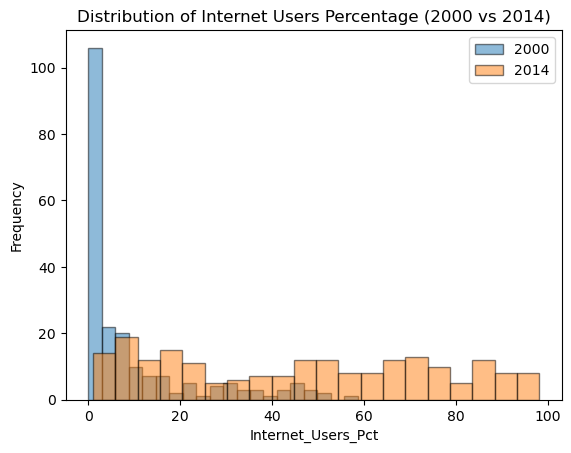

In [72]:

plt.hist(data_2000['Internet_Users_Pct'], bins=20, alpha=0.5, label='2000', edgecolor='black')
plt.hist(data_2014['Internet_Users_Pct'], bins=20, alpha=0.5, label='2014', edgecolor='black')
plt.xlabel('Internet_Users_Pct')
plt.ylabel('Frequency')
plt.title('Distribution of Internet Users Percentage (2000 vs 2014)')
plt.legend()


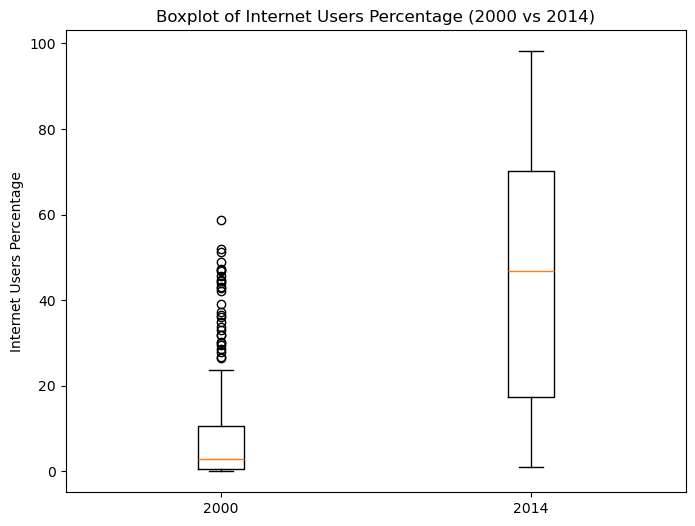

In [73]:
plt.figure(figsize=(8, 6))
plt.boxplot(
    [data_2000['Internet_Users_Pct'], data_2014['Internet_Users_Pct']],
    tick_labels=['2000', '2014']
)
plt.ylabel('Internet Users Percentage')
plt.title('Boxplot of Internet Users Percentage (2000 vs 2014)')
plt.show()

19. For how many countries was the percentage of internet users below 5% in 2014?

In [74]:
below_2014 = internet_df[(internet_df['Year'] == 2014) & (internet_df['Internet_Users_Pct'] < 5)]

In [75]:
below_2014

,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


In [96]:
below_5_percent = below_2014['Internet_Users_Pct'].nunique()


In [77]:
below_5_percent

10

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [78]:
gdp_and_internet_use = pd.merge(
    gdp_df, internet_df, 
    on=['Country', 'Year'], 
    how='outer'
)

In [97]:
gdp_and_internet_use.head()


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2001,NaN,0.004723
2,Afghanistan,2002,1280.463171,0.004561
3,Afghanistan,2003,1292.333437,0.087891
4,Afghanistan,2004,1260.060581,0.105809


In [80]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9107,Zimbabwe,2018,2399.621551,25.0000
9108,Zimbabwe,2019,2203.396810,26.5883
9109,Zimbabwe,2020,1990.319419,29.2986
9110,Zimbabwe,2021,2115.144555,32.4616
9111,Zimbabwe,2022,2143.237574,32.5615


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [81]:
top3_countries = internet_df[internet_df['Year'] == 2014].nlargest(3, 'Internet_Users_Pct')

In [82]:
top3_countries

,Country,Year,Internet_Users_Pct
2592,Iceland,2014,98.158
1893,Falkland (Malvinas) Islands,2014,97.600
602,Bermuda,2014,96.800


In [83]:
top_countries_names = top3_countries['Country']

In [84]:
top_countries_names

2592                        Iceland
1893    Falkland (Malvinas) Islands
602                         Bermuda
Name: Country, dtype: object

In [85]:
top_countries_data = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(top_countries_names)]

In [86]:
top_countries_data

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
770,Bermuda,1990,65961.406278,0.0000
771,Bermuda,1991,63958.896254,NaN
772,Bermuda,1992,64385.407410,NaN
773,Bermuda,1993,65967.850014,NaN
774,Bermuda,1994,65904.720421,NaN
...,...,...,...,...
3824,Iceland,2018,56816.566601,99.0110
3825,Iceland,2019,56584.168683,99.5049
3826,Iceland,2020,51641.392081,99.5328
3827,Iceland,2021,53003.170408,99.6870


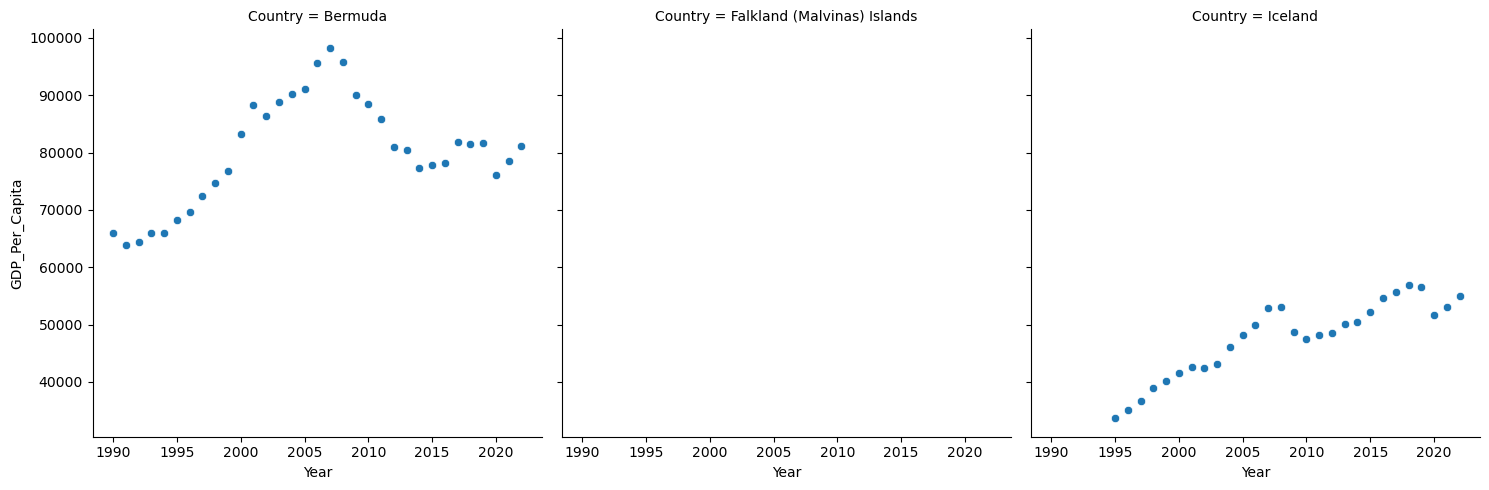

In [87]:
 sns.FacetGrid(top_countries_data, col="Country", col_wrap=3, height=5, sharey=True).map_dataframe(sns.scatterplot, "Year", "GDP_Per_Capita", marker="o")



22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [88]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

In [89]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
14,Afghanistan,2014,2144.449634,7.0000
46,Africa Eastern and Southern,2014,3642.875373,NaN
79,Africa Western and Central,2014,4146.994622,NaN
112,Albania,2014,11586.817446,54.3000
145,Algeria,2014,11561.259795,29.5000
...,...,...,...,...
8978,West Bank and Gaza,2014,5967.073437,NaN
9011,World,2014,15120.730322,NaN
9039,Yemen,2014,NaN,22.5500
9070,Zambia,2014,3375.941270,6.5000


23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

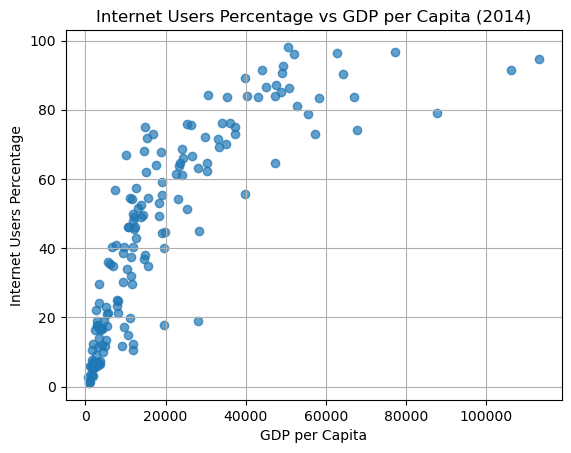

In [90]:
# Scatter plot

plt.scatter(gdp_and_internet_use_2014['GDP_Per_Capita'], gdp_and_internet_use_2014['Internet_Users_Pct'], alpha=0.7)

# Add labels and title
plt.xlabel('GDP per Capita')
plt.ylabel('Internet Users Percentage')
plt.title('Internet Users Percentage vs GDP per Capita (2014)')

# Show plot
plt.grid(True)
plt.show()

#Countries with high GDP but high Internet usage.
#Countries with low GDP but low Internet usage.

In [98]:
import plotly.express as px

fig = px.scatter(
    gdp_and_internet_use_2014,
    x='GDP_Per_Capita',
    y='Internet_Users_Pct',
    size='GDP_Per_Capita',
    color='GDP_Per_Capita',
    hover_name='Country', 
    title="GDP vs Internet Users"
)

fig.update_layout(width=1000, height=600)

fig.show()

ValueError: 
    Invalid element(s) received for the 'size' property of scatter.marker
        Invalid elements include: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above

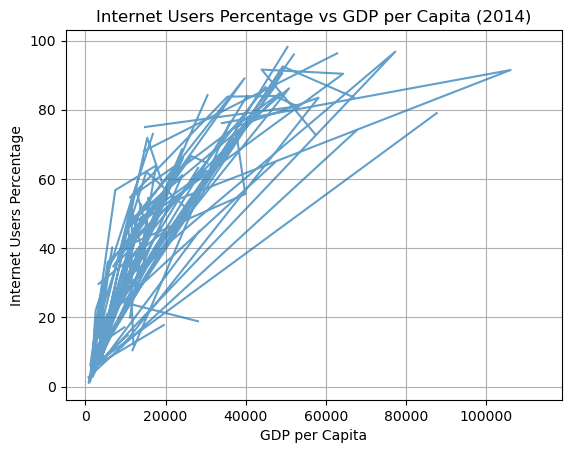

In [91]:
# Scatter plot

plt.plot(gdp_and_internet_use_2014['GDP_Per_Capita'], gdp_and_internet_use_2014['Internet_Users_Pct'], alpha=0.7)

# Add labels and title
plt.xlabel('GDP per Capita')
plt.ylabel('Internet Users Percentage')
plt.title('Internet Users Percentage vs GDP per Capita (2014)')

# Show plot
plt.grid(True)
plt.show()

#Countries with high GDP but low Internet usage.
#Countries with low GDP but high Internet usage.

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [103]:
gdp_and_internet_use_2014.loc[:, 'GDP_group']=pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], q=3, labels=['Low', 'Medium', 'High'])

In [93]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
14,Afghanistan,2014,2144.449634,7.0000,Low
46,Africa Eastern and Southern,2014,3642.875373,NaN,Low
79,Africa Western and Central,2014,4146.994622,NaN,Low
112,Albania,2014,11586.817446,54.3000,Medium
145,Algeria,2014,11561.259795,29.5000,Medium
...,...,...,...,...,...
8978,West Bank and Gaza,2014,5967.073437,NaN,Low
9011,World,2014,15120.730322,NaN,Medium
9039,Yemen,2014,NaN,22.5500,NaN
9070,Zambia,2014,3375.941270,6.5000,Low


25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?


In [94]:
median_users = gdp_and_internet_use_2014.groupby('GDP_group',observed=True)['Internet_Users_Pct'].median()

In [95]:
median_users

GDP_group
Low       11.0000
Medium    45.8752
High      75.9800
Name: Internet_Users_Pct, dtype: float64